# Stochastic Gradient Descent


**Advantages:**
- Capable of handling very large datasets

## Imports

In [1]:
import pandas as pd
import random as rd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
input_header = {"PROC_TRACEINFO" : "id",
                "OP070_V_1_angle_value": "angle_1",
                "OP090_SnapRingPeakForce_value" : "snap_ring_peak_force",
                "OP070_V_2_angle_value" : "angle_2",
                "OP120_Rodage_I_mesure_value" : "rodage_i",
                "OP090_SnapRingFinalStroke_value" : "snap_ring_final_stroke",
                "OP110_Vissage_M8_torque_value" : "vissage_m8_torque",
                "OP100_Capuchon_insertion_mesure" : "capuchon_insertion",
                "OP120_Rodage_U_mesure_value" : "rodage_u",
                "OP070_V_1_torque_value" : "torque_1",
                "OP090_StartLinePeakForce_value" : "start_line_peak_force",
                "OP110_Vissage_M8_angle_value" : "vissage_m8_angle",
                "OP090_SnapRingMidPointForce_val" : "snap_ring_midpoint_force",
                "OP070_V_2_torque_value" : "torque_2"}
output_header = {"PROC_TRACEINFO" : "id",
                 "Binar OP130_Resultat_Global_v" : "result"}

train_input = pd.read_csv("../data/train_inputs.csv", header=0).rename(columns=input_header)
train_output = pd.read_csv("../data/train_output.csv", header=0).rename(columns=output_header)

train_input = train_input[train_input.columns[~train_input.columns.isin(["id", "capuchon_insertion"])]]
X_train, X_test, y_train, y_test = train_test_split(train_input_, train_output["result"], test_size = 0.3, random_state = 123)

NameError: name 'train_input_' is not defined

## Base Line

In [ ]:
# Create model
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

# Prediciton
y_pred = sgd_clf.predict(X_test)

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.9911154031868662

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


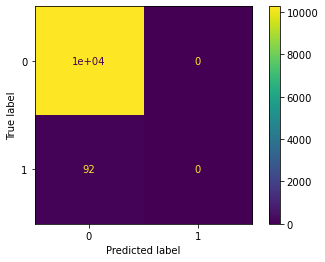

In [ ]:
# Compute confusion matrix
M = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = M.ravel() # True/False negative/positive

# Plot confusion matrix
plot_confusion_matrix(sgd_clf, X_test, y_test)
plt.show()

As always, it is overfitting the data because defective individuals are under represented in population...

## Balanced Classes

Some randomly selected individuals from the valid class (the one which is over represented in the dataset) are removed.

In [ ]:
# Copy dataset
train_input_remove = train_input.copy()
train_output_remove = train_output.copy()

# Select index
defect_index = train_output.index[train_output["result"] == 1].tolist()
valid_index = train_output.index[train_output["result"] == 0].tolist()

# Randomly remove some valid individuals
rd.shuffle(valid_index) # Shuffle in order to eliminate "production correlation"
train_input_remove = train_input_remove.iloc[valid_index[:len(defect_index)] + defect_index,:]
train_output_remove = train_output_remove.iloc[valid_index[:len(defect_index)] + defect_index,:]

# Create new datasets
train_input_remove = train_input_remove[train_input_remove.columns[~train_input_remove.columns.isin(["id", "capuchon_insertion"])]]
X_train, X_test, y_train, y_test = train_test_split(train_input_remove, train_output_remove["result"], test_size = 0.3, random_state = 123)

# Create model
sgd_balanced_clf = SGDClassifier(random_state=42)
sgd_balanced_clf.fit(X_train, y_train)

# Prediciton
y_pred = sgd_balanced_clf.predict(X_test)

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.5136612021857924

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


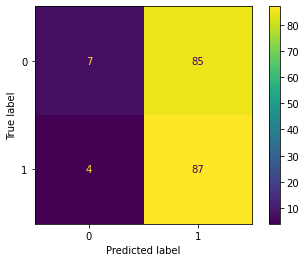

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(sgd_balanced_clf, X_test, y_test)
plt.show()

The overall performance of the classifier decreased but it is now actually trying to class individuals!

## Evaluation

### Cross Validation

In [ ]:
# Copy dataset
train_input_remove = train_input.copy()
train_output_remove = train_output.copy()

# Select index
defect_index = train_output.index[train_output["result"] == 1].tolist()
valid_index = train_output.index[train_output["result"] == 0].tolist()

# Randomly remove some valid individuals
rd.shuffle(valid_index) # Shuffle in order to eliminate "production correlation"
train_input_remove = train_input_remove.iloc[valid_index[:len(defect_index)] + defect_index,:]
train_output_remove = train_output_remove.iloc[valid_index[:len(defect_index)] + defect_index,:]

# Create new datasets
train_input_remove = train_input_remove[train_input_remove.columns[~train_input_remove.columns.isin(["id", "capuchon_insertion"])]]
X_train, X_test, y_train, y_test = train_test_split(train_input_remove, train_output_remove["result"], test_size = 0.3, random_state = 123)

# Create model
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

# Prediction
y_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

# Evaluation
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.5034965 , 0.49295775, 0.48591549])

### Confusion Matrix

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


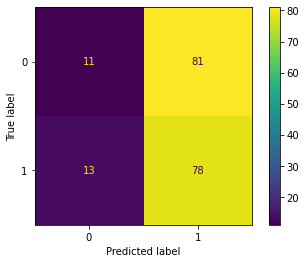

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(sgd_clf, X_test, y_test)
plt.show()

### Precision and Recall

In [ ]:
# Using confusion matrix
M = confusion_matrix(y_train, y_pred)
tn, fp, fn, tp = M.ravel() # True/False negative/positive
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 / ((1/precision) + (1/recall))

# Using sklearn functions
precision = precision_score(y_train, y_pred)
recall_score(y_train, y_pred)
f1_score(y_train, y_pred)

print("Precision =", precision, "\nRecall =", recall, "\nF1 =", f1)

Precision = 0.49375 
Recall = 0.7383177570093458 
F1 = 0.5917602996254682


- Precision: When the classifier claims the individual is defective, it is correct *precision*% of the time
- Recall: The classifier detects *recall*% of the defective individuals

- F1 score: harmonic mean of precision and recall. Gets higher if **both** recall and precision are high. Not always the best score as in some application precision is more important than recall or vice versa.

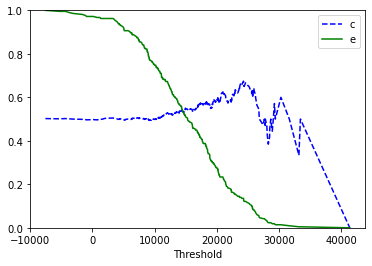

In [ ]:
def plotPrecisionRecallVsThreshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend("center left")
    plt.ylim([0, 1])

y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plotPrecisionRecallVsThreshold(precisions, recalls, thresholds)
plt.show()

Choose the threshold value that gives the best precision/recall tradeoff for the classification.

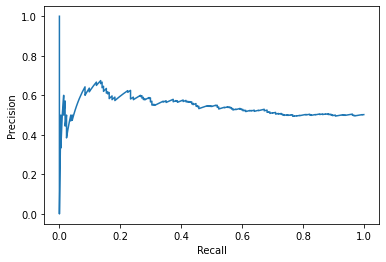

In [ ]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

### ROC Curve

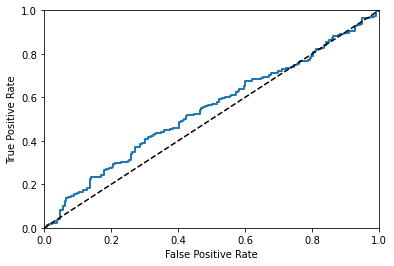

In [ ]:
def plotROC(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plotROC(fpr, tpr)
plt.show()

In [ ]:
roc_auc_score(y_train, y_scores)

0.5432407529287877

ROC AUC Score (1: perfect classifier | 0: random classifier)